Import Libraries

In [1]:
# imports.py

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Optional: to suppress warnings
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported.")


Libraries imported.


Extract the ZIP File

In [2]:
import zipfile
import os

# extract_zip.py
zip_path = "/content/emotions.csv.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted files:", os.listdir(extract_path))

Extracted files: ['.config', 'emotions.csv.zip', 'emotions.csv', 'sample_data']


Load the CSV Inside the ZIP

In [3]:
# load_csv.py
csv_path = os.path.join(extract_path, "emotions.csv")   # ZIP contains emotions.csv
df = pd.read_csv(csv_path)

print("CSV Loaded Successfully!")


CSV Loaded Successfully!


Check Missing Values

In [4]:
print("Total Missing Values in Dataset:", df.isnull().sum().sum())
print("\nMissing Values Per Column (first 20):")
print(df.isnull().sum().head(20))


Total Missing Values in Dataset: 0

Missing Values Per Column (first 20):
# mean_0_a     0
mean_1_a       0
mean_2_a       0
mean_3_a       0
mean_4_a       0
mean_d_0_a     0
mean_d_1_a     0
mean_d_2_a     0
mean_d_3_a     0
mean_d_4_a     0
mean_d_0_a2    0
mean_d_1_a2    0
mean_d_2_a2    0
mean_d_3_a2    0
mean_d_4_a2    0
mean_d_5_a     0
mean_d_6_a     0
mean_d_7_a     0
mean_d_8_a     0
mean_d_9_a     0
dtype: int64


Dataset Shape


In [5]:
print("Dataset Shape:", df.shape)
print("\nLabel Counts:\n", df['label'].value_counts())
print("\nBasic Stats:")
df.describe().T.head(15)


Dataset Shape: (2132, 2549)

Label Counts:
 label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64

Basic Stats:


,count,mean,std,min,25%,50%,75%,max
# mean_0_a,2132.0,15.256914,15.284621,-61.3,6.5775,14.10000,27.700,304.0
mean_1_a,2132.0,27.012462,9.265141,-114.0,26.0750,30.00000,31.400,42.3
mean_2_a,2132.0,-104.975629,206.271960,-970.0,-195.0000,14.95000,29.600,661.0
mean_3_a,2132.0,13.605898,16.874676,-137.0,4.8575,15.40000,26.500,206.0
mean_4_a,2132.0,24.150483,14.187340,-217.0,23.6000,25.20000,26.800,213.0
mean_d_0_a,2132.0,0.025378,17.981796,-218.0,-3.1050,-0.04460,2.920,402.0
mean_d_1_a,2132.0,0.052282,8.509174,-255.0,-1.3400,0.13200,1.540,257.0
mean_d_2_a,2132.0,0.301655,68.098894,-1360.0,-4.0025,0.95750,6.735,1150.0
mean_d_3_a,2132.0,0.036793,17.010031,-203.0,-2.9050,-0.09975,2.535,349.0
mean_d_4_a,2132.0,0.083567,18.935378,-553.0,-2.6225,0.14650,2.870,444.0


Label Distribution Plot

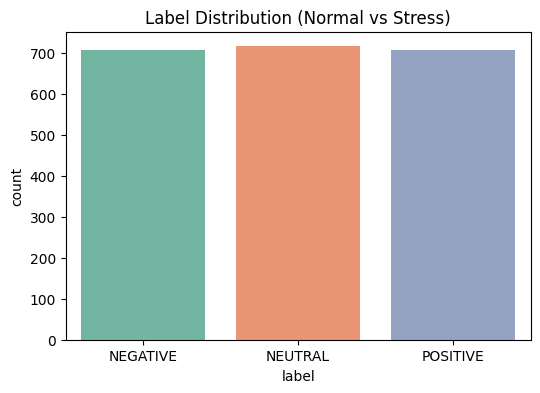

In [6]:
# label_distribution.py
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='Set2')
plt.title("Label Distribution (Normal vs Stress)")
plt.show()


Feature Variance Plot

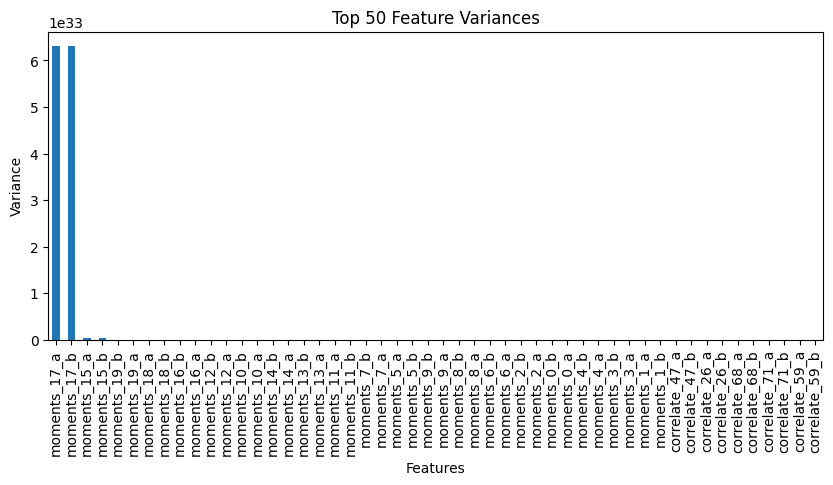

In [7]:
# feature_variance.py
import numpy as np

variances = df.drop('label', axis=1).var().sort_values(ascending=False)

plt.figure(figsize=(10,4))
variances[:50].plot(kind='bar')
plt.title("Top 50 Feature Variances")
plt.xlabel("Features")
plt.ylabel("Variance")
plt.show()


First 20 Columns

In [8]:
# columns.py
print("First 20 Columns:")
print(df.columns[:20].tolist())


First 20 Columns:
['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a', 'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a', 'mean_d_0_a2', 'mean_d_1_a2', 'mean_d_2_a2', 'mean_d_3_a2', 'mean_d_4_a2', 'mean_d_5_a', 'mean_d_6_a', 'mean_d_7_a', 'mean_d_8_a', 'mean_d_9_a']


First 5 Rows

In [9]:
# head.py
print("\n--- df.head() ---")
print(df.head())



--- df.head() ---
   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_7

Dataset Info

In [10]:
# info.py
print("\n--- df.info() ---")
print(df.info())



--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB
None


Label Value Counts

In [11]:
# label_counts.py
print("\n--- Label Value Counts ---")
print(df['label'].value_counts())



--- Label Value Counts ---
label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64


Remove Neutral Class

In [12]:
# corrected_remove_neutral.py
df_no_neutral = df[df['label'] != "NEUTRAL"]

print("Shape after removing NEUTRAL:", df_no_neutral.shape)
print(df_no_neutral['label'].value_counts())


Shape after removing NEUTRAL: (1416, 2549)
label
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64


Replace POSITIVE → NORMAL, NEGATIVE → STRESS

In [13]:
# replace_strings.py
df_no_neutral['label'] = df_no_neutral['label'].replace({
    "POSITIVE": "NORMAL",
    "NEGATIVE": "STRESS"
})

print("Labels renamed successfully!")
print(df_no_neutral['label'].value_counts())


Labels renamed successfully!
label
STRESS    708
NORMAL    708
Name: count, dtype: int64


Convert NORMAL → 0 and STRESS → 1

In [14]:
# label_mapping_numbers.py
df_no_neutral['label'] = df_no_neutral['label'].map({
    "NORMAL": 0,
    "STRESS": 1
})

print("Numeric mapping done!")
print(df_no_neutral['label'].value_counts())


Numeric mapping done!
label
1    708
0    708
Name: count, dtype: int64


Separate Features (X) and Label (y)

In [15]:
# split_features_labels.py
X = df_no_neutral.drop('label', axis=1)
y = df_no_neutral['label']

print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (1416, 2548)
Labels shape: (1416,)


Train-Test Split

In [16]:
# train_test_split.py
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)


Train shapes: (1132, 2548) (1132,)
Test shapes: (284, 2548) (284,)


Scaling (StandardScaler)

In [17]:
# scaling.py
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed!")


Scaling completed!


PCA (Keep 95% Variance)

In [18]:
# pca.py
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original features:", X_train.shape[1])
print("Reduced features:", X_train_pca.shape[1])


Original features: 2548
Reduced features: 142


PCA Explained Variance Plot

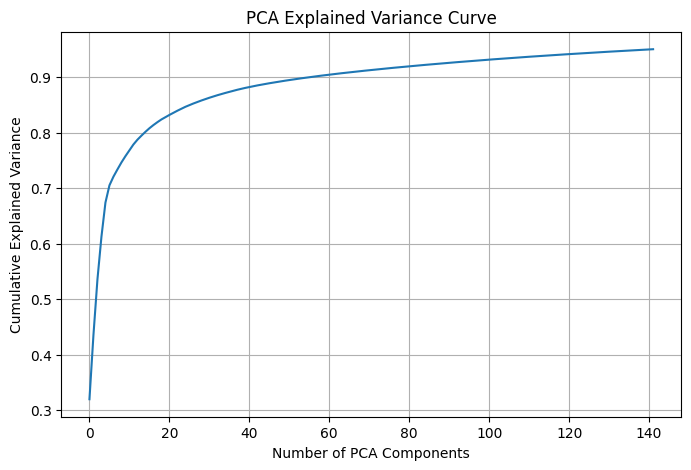

In [19]:
# pca_variance_plot.py
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance Curve")
plt.grid(True)
plt.show()


Scree Plot (Explained Variance per PCA Component)

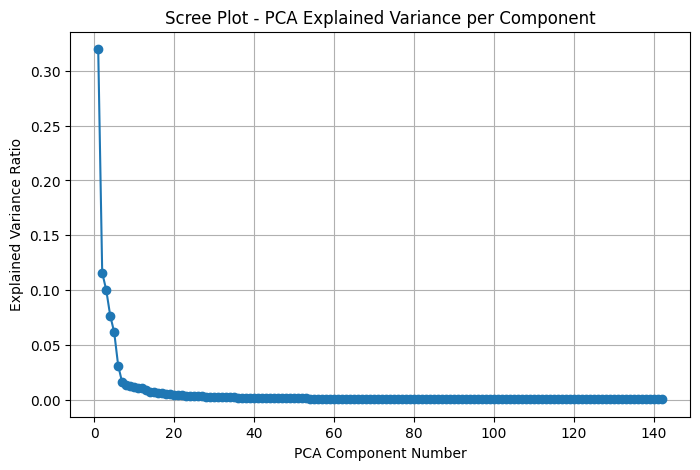

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot - PCA Explained Variance per Component")
plt.xlabel("PCA Component Number")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


Cumulative Explained Variance Plot

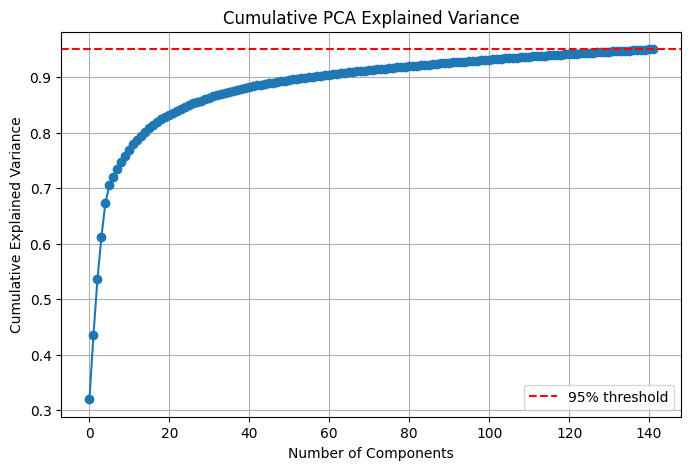

In [21]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(0.95, color='red', linestyle='--', label="95% threshold")
plt.title("Cumulative PCA Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.show()


2D PCA Visualization (Stress vs Normal)

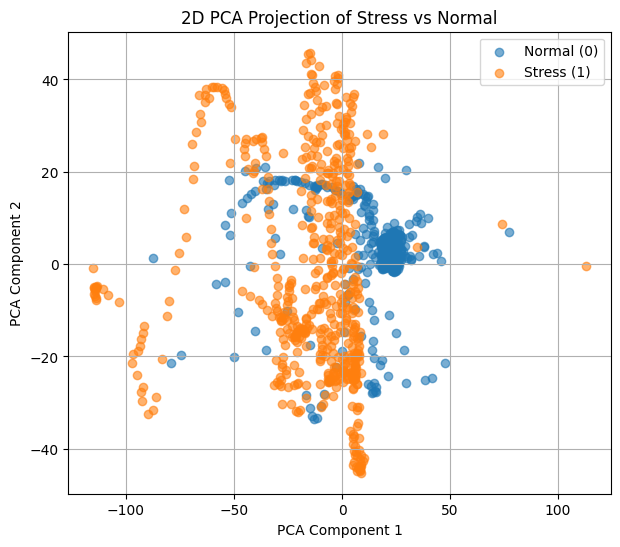

In [22]:
# Perform PCA with 2 components for visualization
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_train_2d[y_train == 0, 0], X_train_2d[y_train == 0, 1],
            label="Normal (0)", alpha=0.6)
plt.scatter(X_train_2d[y_train == 1, 0], X_train_2d[y_train == 1, 1],
            label="Stress (1)", alpha=0.6)
plt.title("2D PCA Projection of Stress vs Normal")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


Logistic Regression Training

In [23]:
# logistic_regression.py
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_pca, y_train)

print("Logistic Regression model trained!")


Logistic Regression model trained!


Evaluate Logistic Regression

In [24]:
# lr_evaluation.py
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_lr = log_model.predict(X_test_pca)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9577464788732394

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       142
           1       0.96      0.96      0.96       142

    accuracy                           0.96       284
   macro avg       0.96      0.96      0.96       284
weighted avg       0.96      0.96      0.96       284


Confusion Matrix:
 [[136   6]
 [  6 136]]


Confusion Matrix Heatmap

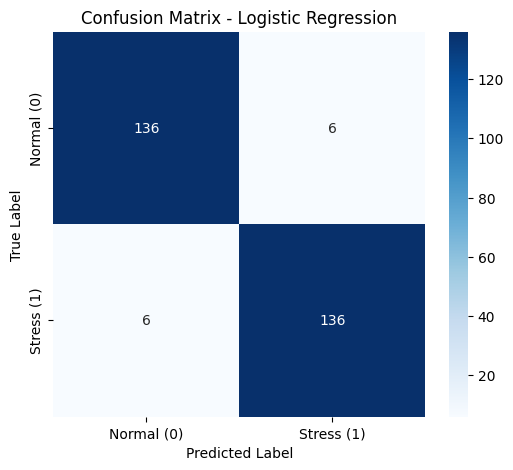

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Use your correct prediction variable
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal (0)", "Stress (1)"],
            yticklabels=["Normal (0)", "Stress (1)"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


ROC Curve (Logistic Regression)

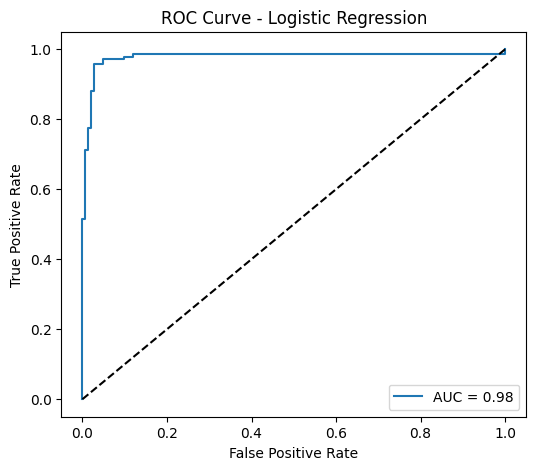

In [26]:
from sklearn.metrics import roc_curve, auc

# Get probability scores (needed for ROC)
y_prob_lr = log_model.predict_proba(X_test_pca)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


Precision–Recall Curve

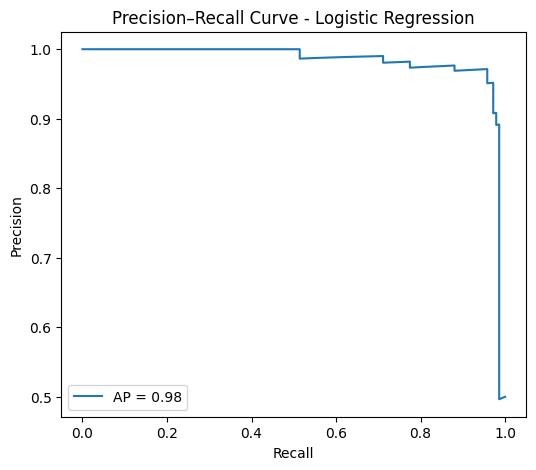

In [27]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob_lr)
avg_precision = average_precision_score(y_test, y_prob_lr)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"AP = {avg_precision:.2f}")
plt.title("Precision–Recall Curve - Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


SVM Model Training

In [28]:
# svm_train.py
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_pca, y_train)

print("SVM model trained successfully!")


SVM model trained successfully!


SVM Evaluation

In [29]:
# svm_evaluation.py
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_svm = svm_model.predict(X_test_pca)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.9507042253521126

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       142
           1       0.93      0.97      0.95       142

    accuracy                           0.95       284
   macro avg       0.95      0.95      0.95       284
weighted avg       0.95      0.95      0.95       284


Confusion Matrix:
 [[132  10]
 [  4 138]]


SVM Confusion Matrix Graph

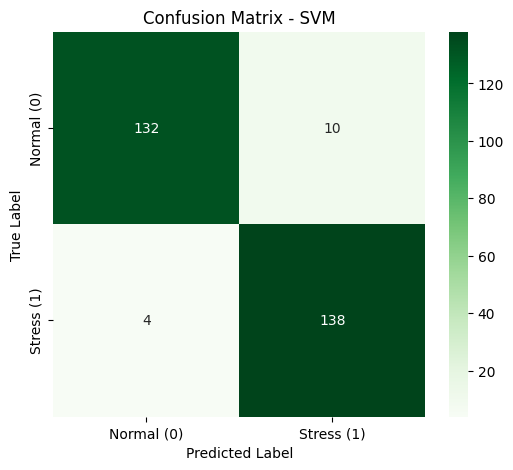

In [30]:
plt.figure(figsize=(6,5))
cm_svm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Normal (0)", "Stress (1)"],
            yticklabels=["Normal (0)", "Stress (1)"])

plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


SVM ROC Curve

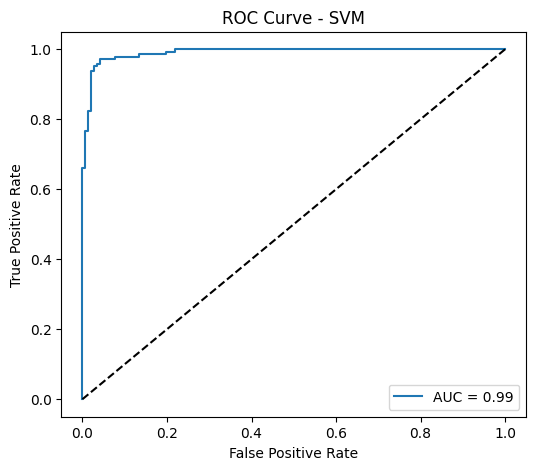

In [31]:
y_prob_svm = svm_model.predict_proba(X_test_pca)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


SVM Precision–Recall Curve

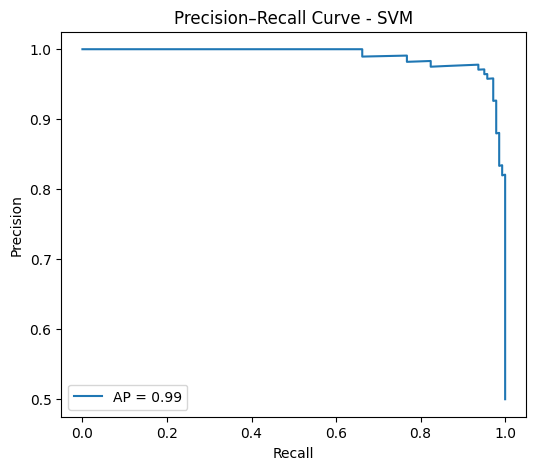

In [32]:
precision, recall, _ = precision_recall_curve(y_test, y_prob_svm)
avg_precision = average_precision_score(y_test, y_prob_svm)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"AP = {avg_precision:.2f}")
plt.title("Precision–Recall Curve - SVM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


Compare Logistic Regression vs SVM (Accuracy Table)

In [33]:
# compare_accuracy.py
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("Logistic Regression Accuracy:", acc_lr)
print("SVM Accuracy:", acc_svm)

comparison = {
    "Model": ["Logistic Regression", "SVM"],
    "Accuracy": [acc_lr, acc_svm]
}

comparison


Logistic Regression Accuracy: 0.9577464788732394
SVM Accuracy: 0.9507042253521126


{'Model': ['Logistic Regression', 'SVM'],
 'Accuracy': [0.9577464788732394, 0.9507042253521126]}

Bar Chart Comparison (LR vs SVM)

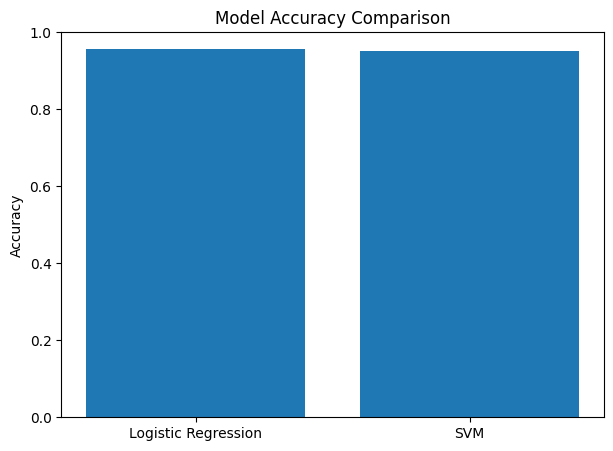

In [34]:
# accuracy_bar_plot.py
import matplotlib.pyplot as plt

models = ["Logistic Regression", "SVM"]
accuracies = [acc_lr, acc_svm]

plt.figure(figsize=(7,5))
plt.bar(models, accuracies)
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


ROC Curve Comparison (Both in One Plot)

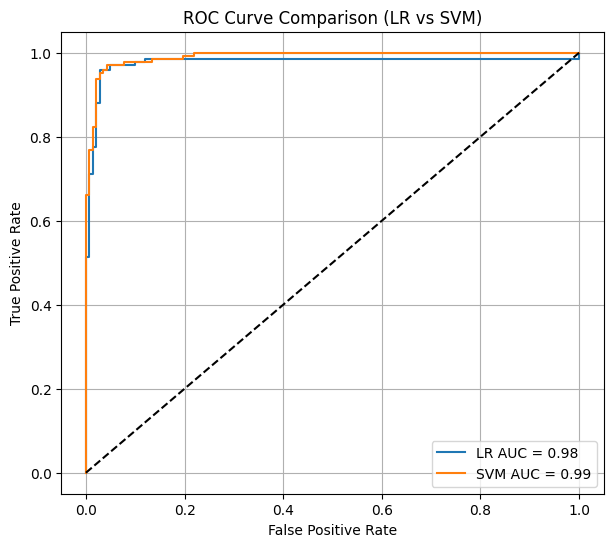

In [35]:
# compare_roc.py

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label=f"LR AUC = {auc_lr:.2f}")
plt.plot(fpr_svm, tpr_svm, label=f"SVM AUC = {auc_svm:.2f}")
plt.plot([0,1],[0,1],'k--')

plt.title("ROC Curve Comparison (LR vs SVM)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


Precision–Recall Comparison

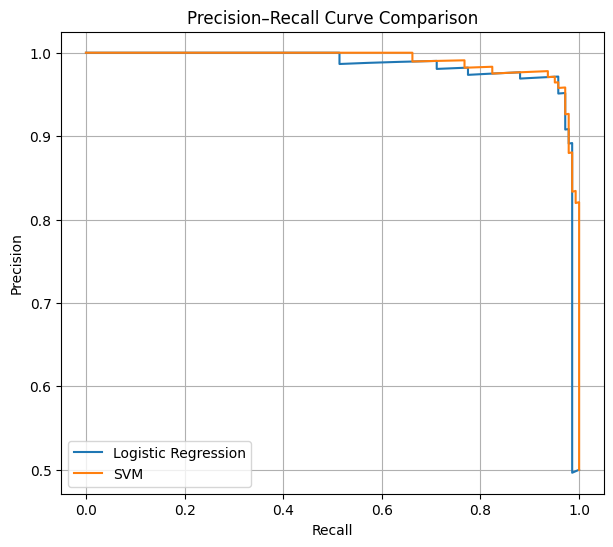

In [36]:
# compare_pr.py

# Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)

# SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)

plt.figure(figsize=(7,6))
plt.plot(recall_lr, precision_lr, label="Logistic Regression")
plt.plot(recall_svm, precision_svm, label="SVM")

plt.title("Precision–Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


FINAL MODEL COMPARISON CODE

In [37]:
# final_model_comparison.py
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# --- Logistic Regression scores ---
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# --- SVM scores ---
acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

print("=== Logistic Regression Performance ===")
print("Accuracy:", acc_lr)
print("F1-score:", f1_lr)
print("AUC:", auc_lr)

print("\n=== SVM Performance ===")
print("Accuracy:", acc_svm)
print("F1-score:", f1_svm)
print("AUC:", auc_svm)

# --- Decide which is better ---
print("\n=== Final Conclusion ===")

if acc_svm > acc_lr:
    print("SVM is better based on Accuracy.")
elif acc_svm < acc_lr:
    print("Logistic Regression is better based on Accuracy.")
else:
    print("Both models have equal Accuracy.")

if f1_svm > f1_lr:
    print("SVM is better based on F1-score.")
elif f1_svm < f1_lr:
    print("Logistic Regression is better based on F1-score.")
else:
    print("Both models have equal F1-score.")

if auc_svm > auc_lr:
    print("SVM is better based on AUC (ROC Curve).")
elif auc_svm < auc_lr:
    print("Logistic Regression is better based on AUC (ROC Curve).")
else:
    print("Both models have equal AUC Score.")


=== Logistic Regression Performance ===
Accuracy: 0.9577464788732394
F1-score: 0.9577464788732394
AUC: 0.9769886927196985

=== SVM Performance ===
Accuracy: 0.9507042253521126
F1-score: 0.9517241379310345
AUC: 0.9904284864114263

=== Final Conclusion ===
Logistic Regression is better based on Accuracy.
Logistic Regression is better based on F1-score.
SVM is better based on AUC (ROC Curve).


Logistic Regression Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Parameter grid for LR
lr_params = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "solver": ["lbfgs", "liblinear"]
}

lr = LogisticRegression(max_iter=500)

grid_lr = GridSearchCV(
    lr,
    lr_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_lr.fit(X_train_pca, y_train)

print("Best LR Parameters:", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_


Best LR Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


SVM Hyperparameter Tuning

In [39]:
from sklearn.svm import SVC

svm_params = {
    "C": [0.1, 1, 10, 50, 100],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1],
    "kernel": ["rbf", "linear"]
}

svm = SVC(probability=True)

grid_svm = GridSearchCV(
    svm,
    svm_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_svm.fit(X_train_pca, y_train)

print("Best SVM Parameters:", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_


Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


Evaluate Tuned Models of LR

In [40]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_pred_lr = best_lr.predict(X_test_pca)
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, best_lr.predict_proba(X_test_pca)[:,1])

print("Tuned LR Accuracy:", lr_acc)
print("Tuned LR F1:", lr_f1)
print("Tuned LR AUC:", lr_auc)


Tuned LR Accuracy: 0.9612676056338029
Tuned LR F1: 0.9614035087719298
Tuned LR AUC: 0.978228526086094


Evaluate Tuned Models of SVM

In [41]:
y_pred_svm = best_svm.predict(X_test_pca)
svm_acc = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, best_svm.predict_proba(X_test_pca)[:,1])

print("Tuned SVM Accuracy:", svm_acc)
print("Tuned SVM F1:", svm_f1)
print("Tuned SVM AUC:", svm_auc)


Tuned SVM Accuracy: 0.9753521126760564
Tuned SVM F1: 0.9752650176678446
Tuned SVM AUC: 0.9975203332672088


Compare Tuned Models

In [42]:
print("=== Tuned Model Comparison ===")
print("LR Accuracy:", lr_acc, " | SVM Accuracy:", svm_acc)
print("LR F1:", lr_f1, " | SVM F1:", svm_f1)
print("LR AUC:", lr_auc, " | SVM AUC:", svm_auc)

print("\n=== Final Conclusion ===")

# Accuracy comparison
if lr_acc > svm_acc:
    print("Logistic Regression has better Accuracy.")
elif lr_acc < svm_acc:
    print("SVM has better Accuracy.")
else:
    print("Both models have equal Accuracy.")

# F1-score comparison
if lr_f1 > svm_f1:
    print("Logistic Regression has better F1-score.")
elif lr_f1 < svm_f1:
    print("SVM has better F1-score.")
else:
    print("Both models have equal F1-score.")

# AUC comparison
if lr_auc > svm_auc:
    print("Logistic Regression has better AUC (ROC).")
elif lr_auc < svm_auc:
    print("SVM has better AUC (ROC).")
else:
    print("Both models have equal AUC (ROC).")


=== Tuned Model Comparison ===
LR Accuracy: 0.9612676056338029  | SVM Accuracy: 0.9753521126760564
LR F1: 0.9614035087719298  | SVM F1: 0.9752650176678446
LR AUC: 0.978228526086094  | SVM AUC: 0.9975203332672088

=== Final Conclusion ===
SVM has better Accuracy.
SVM has better F1-score.
SVM has better AUC (ROC).


FINAL COMPARISON BAR CHART (LR vs SVM)

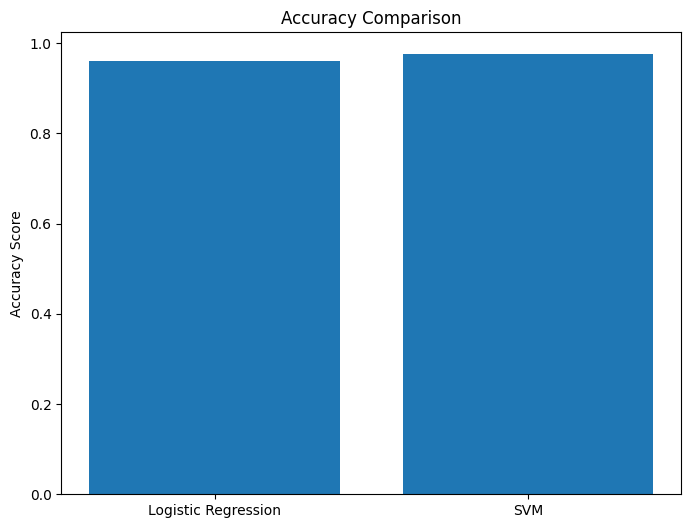

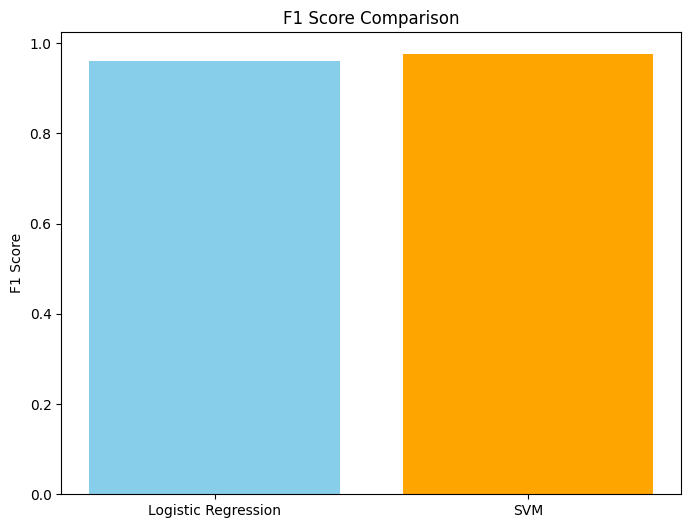

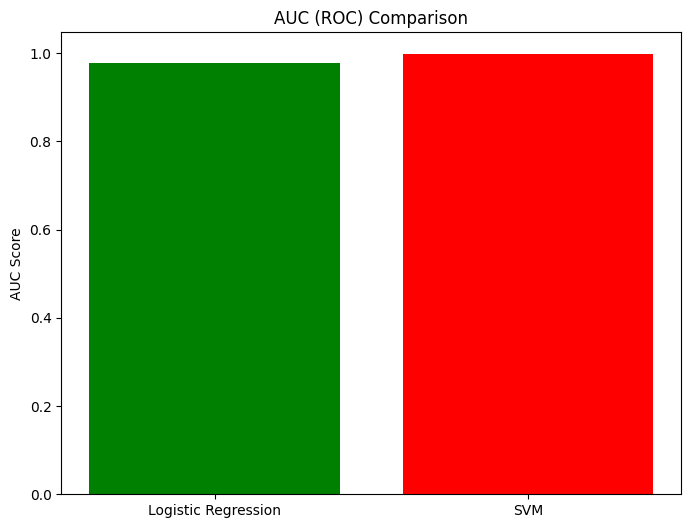

In [43]:
# step_final_comparison_plot.py
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM']
accuracy_scores = [lr_acc, svm_acc]
f1_scores = [lr_f1, svm_f1]
auc_scores = [lr_auc, svm_auc]

plt.figure(figsize=(8,6))
plt.bar(models, accuracy_scores, label="Accuracy")
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()

plt.figure(figsize=(8,6))
plt.bar(models, f1_scores, color=['skyblue', 'orange'])
plt.title("F1 Score Comparison")
plt.ylabel("F1 Score")
plt.show()

plt.figure(figsize=(8,6))
plt.bar(models, auc_scores, color=['green', 'red'])
plt.title("AUC (ROC) Comparison")
plt.ylabel("AUC Score")
plt.show()


GridSearchCV for Logistic Regression

In [44]:
from sklearn.model_selection import GridSearchCV

lr_params = {
    "C": [0.01, 0.1, 1, 10, 50],
    "penalty": ["l2"],
    "solver": ["lbfgs"],
    "max_iter": [200, 300, 500]
}

lr_grid = GridSearchCV(
    log_model,
    lr_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

lr_grid.fit(X_train_pca, y_train)

best_lr = lr_grid.best_estimator_

print("Best LR Params:", lr_grid.best_params_)
print("Best LR Accuracy:", lr_grid.best_score_)


Best LR Params: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Best LR Accuracy: 0.9496705781451016


GridSearchCV for SVM

In [45]:
svm_params = {
    "C": [0.1, 1, 10, 50],
    "kernel": ["rbf", "linear"],
    "gamma": ["scale", "auto"]
}

svm_grid = GridSearchCV(
    svm_model,
    svm_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

svm_grid.fit(X_train_pca, y_train)

best_svm = svm_grid.best_estimator_

print("Best SVM Params:", svm_grid.best_params_)
print("Best SVM Accuracy:", svm_grid.best_score_)


Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Accuracy: 0.981454914038439


Evaluate Tuned Models on Test Set

In [46]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# ------------ Logistic Regression ------------
lr_pred = best_lr.predict(X_test_pca)
lr_acc = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, best_lr.predict_proba(X_test_pca)[:,1])

# ------------ SVM ------------
svm_pred = best_svm.predict(X_test_pca)
svm_acc = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_auc = roc_auc_score(y_test, svm_grid.predict_proba(X_test_pca)[:,1])

# ------------ Print Results ------------
print("=== Tuned Model Comparison ===")
print("LR Accuracy:", lr_acc, " | SVM Accuracy:", svm_acc)
print("LR F1:", lr_f1, " | SVM F1:", svm_f1)
print("LR AUC:", lr_auc, " | SVM AUC:", svm_auc)

# ------------ Automatic Best Model Selection ------------

print("\n=== Final Conclusion ===")

# Accuracy
if svm_acc > lr_acc:
    print("SVM has better Accuracy.")
else:
    print("Logistic Regression has better Accuracy.")

# F1 Score
if svm_f1 > lr_f1:
    print("SVM has better F1-score.")
else:
    print("Logistic Regression has better F1-score.")

# AUC
if svm_auc > lr_auc:
    print("SVM has better AUC (ROC).")
else:
    print("Logistic Regression has better AUC (ROC).")


=== Tuned Model Comparison ===
LR Accuracy: 0.9577464788732394  | SVM Accuracy: 0.9753521126760564
LR F1: 0.9577464788732394  | SVM F1: 0.9752650176678446
LR AUC: 0.9769886927196985  | SVM AUC: 0.9975203332672088

=== Final Conclusion ===
SVM has better Accuracy.
SVM has better F1-score.
SVM has better AUC (ROC).


Save the Tuned Final Model

In [47]:
import pickle

# Save best tuned SVM model
with open("best_svm_model.pkl", "wb") as f:
    pickle.dump(best_svm, f)

# Save PCA transformer
with open("pca_transform.pkl", "wb") as f:
    pickle.dump(pca, f)

print("Best SVM model + PCA saved successfully!")


Best SVM model + PCA saved successfully!


SAVE THE SCALER

In [48]:
# step_save_scaler.py
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaler saved successfully!")


Scaler saved successfully!


Test Prediction With Saved Model

In [49]:
import pickle
import numpy as np

# Load model and PCA
svm_loaded = pickle.load(open("best_svm_model.pkl", "rb"))
pca_loaded = pickle.load(open("pca_transform.pkl", "rb"))

# Take one sample from test set
sample = X_test.iloc[0].values.reshape(1, -1)
sample_pca = pca_loaded.transform(sample)

prediction = svm_loaded.predict(sample_pca)[0]

print("Prediction:", "Stress" if prediction == 1 else "Normal")


Prediction: Normal


Find Misclassified Samples

In [50]:
#error_samples.py
import numpy as np

misclassified_idx = np.where(y_test != svm_pred)[0]
print("Total Misclassified Samples:", len(misclassified_idx))
print("First 20 Misclassified Sample Indices:", misclassified_idx[:20])


Total Misclassified Samples: 7
First 20 Misclassified Sample Indices: [ 28  54 113 167 174 214 261]


Error Rate

In [51]:
error_rate = len(misclassified_idx) / len(y_test)
print("Error Rate:", error_rate)


Error Rate: 0.02464788732394366


PCA Component Importance

In [52]:
#pca_importance.py
import numpy as np

importance = pca.explained_variance_ratio_
top_10 = np.argsort(importance)[-10:]

print("Top 10 PCA Components Contributing to Variance:")
for comp in top_10:
    print(f"PCA Component {comp} → Variance Contribution: {importance[comp]:.4f}")


Top 10 PCA Components Contributing to Variance:
PCA Component 9 → Variance Contribution: 0.0113
PCA Component 8 → Variance Contribution: 0.0126
PCA Component 7 → Variance Contribution: 0.0130
PCA Component 6 → Variance Contribution: 0.0157
PCA Component 5 → Variance Contribution: 0.0310
PCA Component 4 → Variance Contribution: 0.0614
PCA Component 3 → Variance Contribution: 0.0768
PCA Component 2 → Variance Contribution: 0.1002
PCA Component 1 → Variance Contribution: 0.1159
PCA Component 0 → Variance Contribution: 0.3198


Logistic Regression Feature Importance

In [53]:
#lr_coefficients.py
coef = best_lr.coef_[0]

top_positive = np.argsort(coef)[-10:]
top_negative = np.argsort(coef)[:10]

print("Top 10 Features indicating STRESS (LR):", top_positive)
print("Top 10 Features indicating NORMAL (LR):", top_negative)


Top 10 Features indicating STRESS (LR): [50 48  3 55 34 26 13 51  6 21]
Top 10 Features indicating NORMAL (LR): [ 28  53  93  12 126  23  11 119  58  36]


SVM Decision Function Confidence

In [54]:
#svm_confidence.py
confidence_scores = best_svm.decision_function(X_test_pca)

print("Sample Confidence Scores (First 10):")
print(confidence_scores[:10])


Sample Confidence Scores (First 10):
[-2.24445323  1.00413742  1.25719965 -1.58478927 -2.33144027  0.67958569
 -0.03946253  1.60878427  1.95365185  0.9549599 ]
